<h1>Data Analytics Project</h1>

<h2> United Kingdom Road Accident Data Analysis</h2>
<h3> Inclusive years : 2019 - 2022</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [4]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [5]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1> Data Preparation </h1>

In [6]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [8]:
#accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [9]:
accident['Accident_Severity'].value_counts ()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1>Converting Object to Date Time Data Type</h1>

In [10]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [11]:
accident['Accident Date']

0        2019-06-05
1        2019-07-02
2        2019-08-26
3        2019-08-16
4        2019-09-03
            ...    
660674   2022-02-18
660675   2022-02-21
660676   2022-02-23
660677   2022-02-23
660678   2022-02-28
Name: Accident Date, Length: 660679, dtype: datetime64[ns]

<h1>CLEARING NULL VALUES</h1>

In [12]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [13]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [14]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting date information using pandas date time</h1>

In [15]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [16]:
accident['Year'] = pd.to_numeric(accident['Year'], errors='coerce')
accident['Month'] = pd.to_numeric(accident['Month'], errors='coerce')

<h1>ADJUSTING DATA TYPES</h1>

In [17]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [18]:
accident['Latitude'] = accident['Latitude'].astype('category' )
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category' )
accident['District Area'] = accident['District Area'].astype('category' )
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category' )
accident['Road_Type'] = accident['Road_Type'].astype('category' )
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category' )
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category' )

In [19]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area                object
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [20]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [21]:
df_2019 = accident[accident['Year'] == 2019]
df_2022 = accident[accident['Year'] == 2022]

In [22]:
light_accidents = df_2019.groupby('Light_Conditions').size()

In [23]:
light_accidents

Light_Conditions
Darkness - lighting unknown      1768
Darkness - lights lit           35769
Darkness - lights unlit           694
Darkness - no lighting          10842
Daylight                       133042
dtype: int64

In [24]:
acc_day = df_2019.groupby(df_2019['Accident Date'].dt.day_name()).size()

In [25]:
acc_day

Accident Date
Friday       27303
Monday       20386
Saturday     29262
Sunday       24686
Thursday     27300
Tuesday      26251
Wednesday    26927
dtype: int64

<h1>Data Analytics</h1>

<h4>Analyzing Each Field from Data set</h4>

<h1>UniVariate</h1>

In [26]:
df_2019 = accident[accident['Year'] == 2019]

#df_2019
#urban, rural, severity, casualty

df_2019['Accident_Severity'].value_counts()

new_df = df_2019[df_2019['Accident_Severity'] != 'Slight']

In [27]:
visual = new_df.groupby(['Urban_or_Rural_Area', 'Accident_Severity']) ['Number_of_Casualties'].sum().reset_index()

visual

,Urban_or_Rural_Area,Accident_Severity,Number_of_Casualties
0,Rural,Fatal,3844
1,Rural,Serious,17502
2,Urban,Fatal,1507
3,Urban,Serious,18594


<h3>Univariate Analysis from year 2019</h3>

<h1>Seasonal Analysis</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

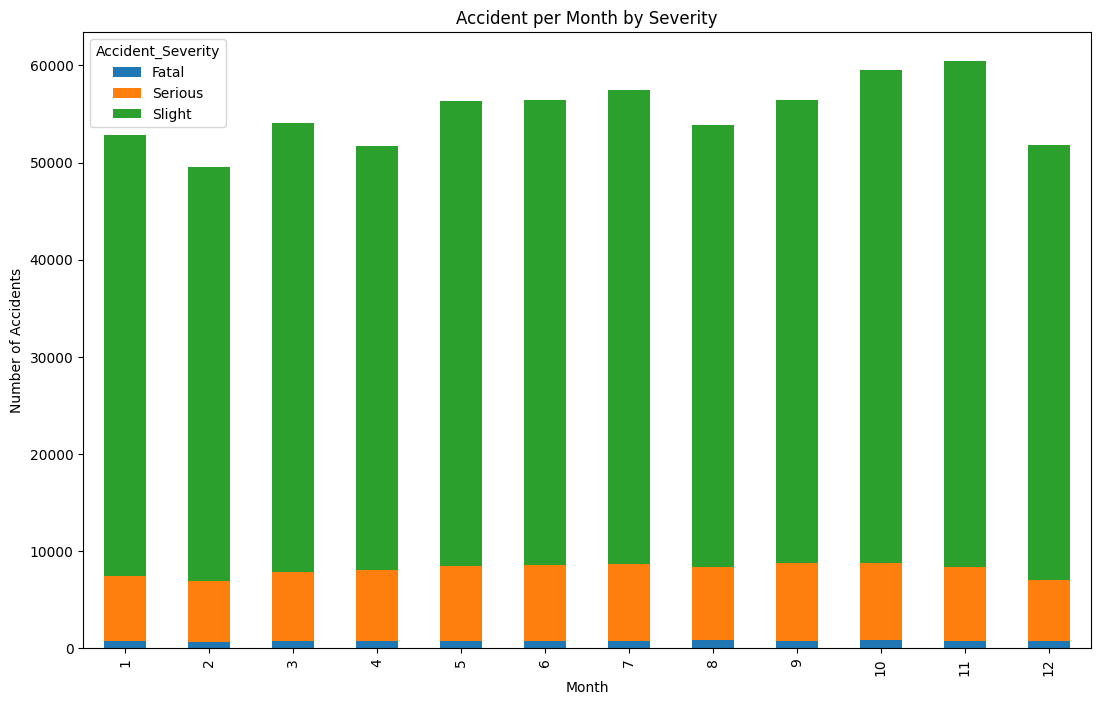

In [28]:
accident_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

accident_per_month_severity.plot(kind = 'bar', stacked = True)
plt.title('Accident per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show

<h2> Area Analysis</h2>

In [29]:
area_year = accident.groupby(['District Area', 'Year']).size().reset_index(name= 'Accident_Count')

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')

pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


<h3> Creating a line plot </h3>

<function matplotlib.pyplot.show(close=None, block=None)>

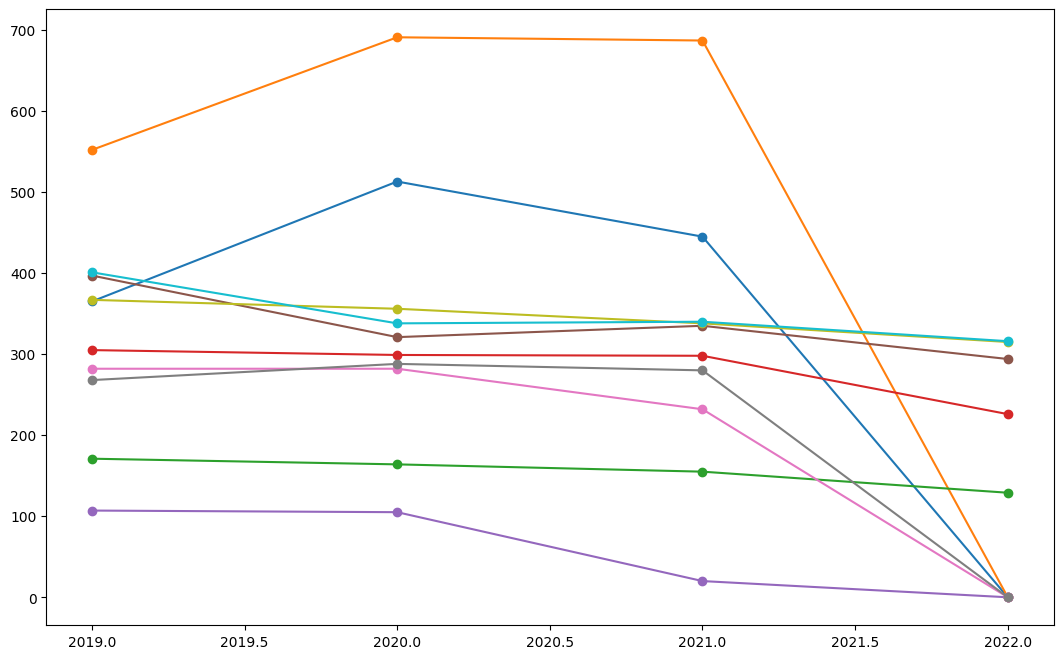

In [30]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker ='o')
    if count == 10:
        break

plt.gcf().set_size_inches(13,8)
plt.legend
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

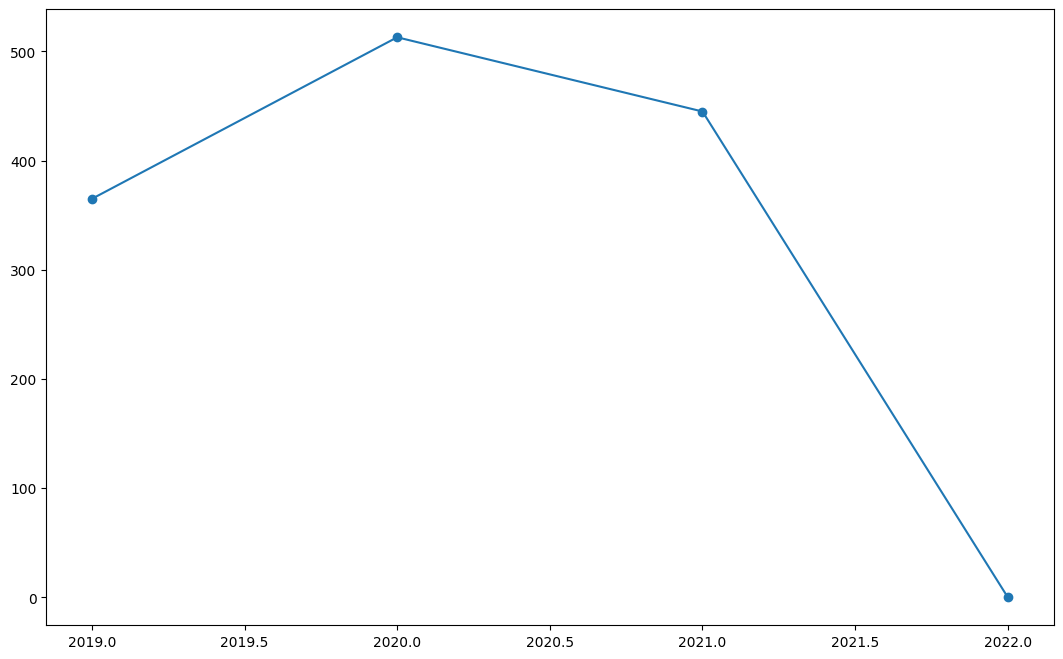

In [31]:
plt.plot(pivot_table.index, pivot_table['Aberdeen City'], label = 'ABERDEEN CITY', marker = 'o')

plt.gcf().set_size_inches(13,8)
plt.legend
plt.show

<h1>Visualizing Correlation</h1>

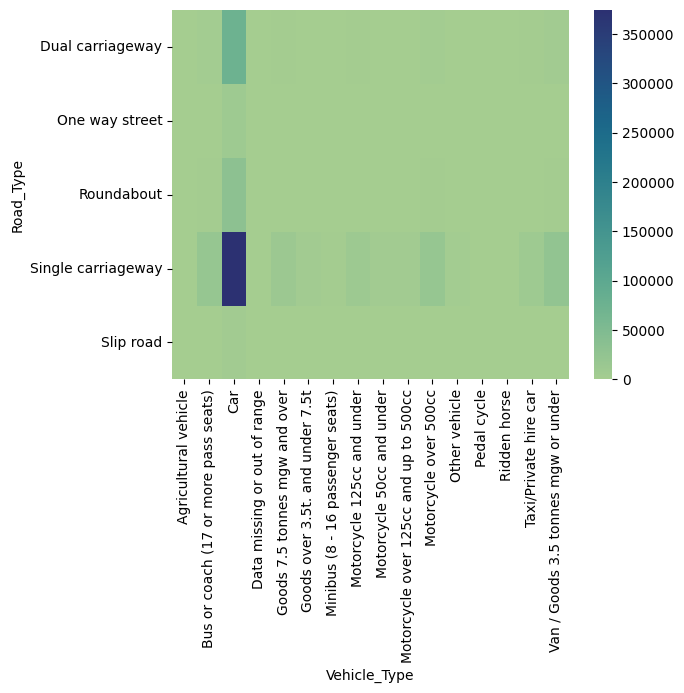

In [32]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(type_vh, cmap="crest")
plt.show() 

<h1>INSIGHTS</h1>

<h1>1. Distribution of Accidents by Day of the Week</h1>

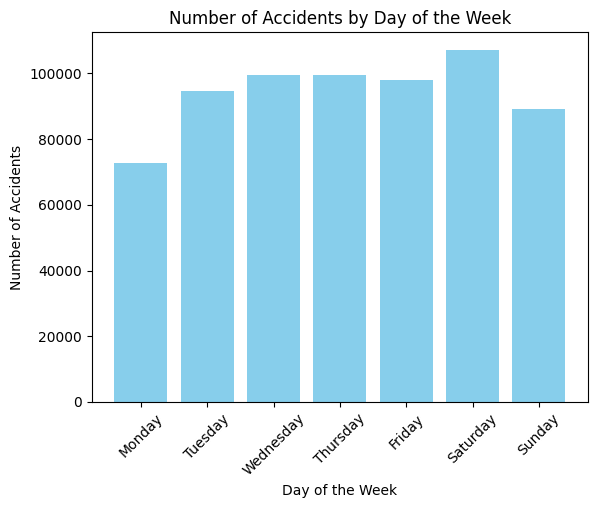

In [78]:
accidents_per_day = accident["DayOfWeek"].value_counts().sort_index()

day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot bar chart
plt.bar(day_labels, accidents_per_day, color='skyblue')
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h1>2. Most common weather condition during accidents</h1>

In [79]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h4>INSIGHT: The most common weather condition during accidents is Fine on high winds.</h4>

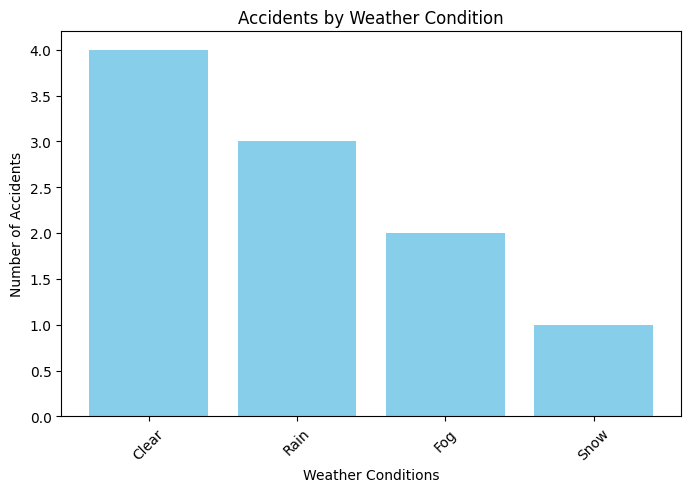

In [80]:
# DataFrame
data = {'Weather_Conditions': ['Clear', 'Rain', 'Fog', 'Clear', 'Snow', 'Rain', 'Clear', 'Fog', 'Rain', 'Clear']}
accident = pd.DataFrame(data)

# Get weather condition counts
weather_counts = accident['Weather_Conditions'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=45)
plt.show()

<h1>3. Urban vs. Rural area accident percentage</h1>

<h4>INSIGHT: It shows that urban is an accident prone area.</h4>

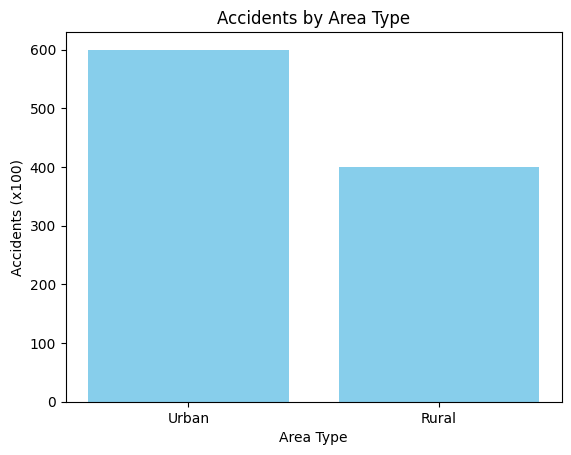

In [81]:
#DataFrame
data = {'Urban_or_Rural_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural']}
accident = pd.DataFrame(data)

# Get urban/rural area counts multiplied by 100
area_counts = accident['Urban_or_Rural_Area'].value_counts() * 100

plt.bar(area_counts.index, area_counts.values, color='skyblue')
plt.xlabel('Area Type')
plt.ylabel('Accidents (x100)')
plt.title('Accidents by Area Type')
plt.show()

<h1>4. Number of Casualties vs. Road Type</h1>

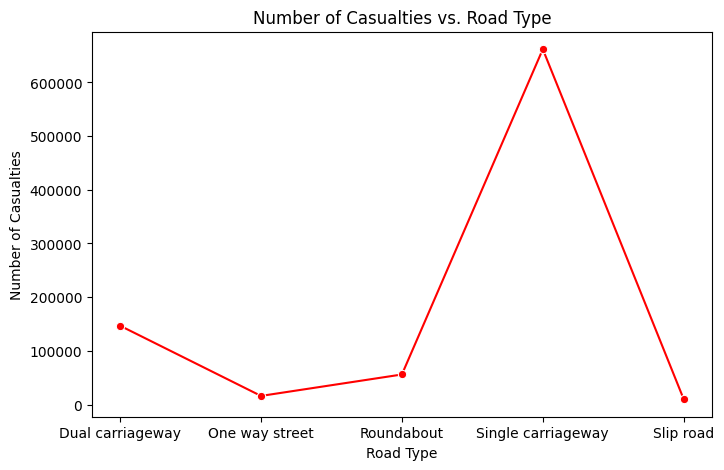

In [90]:
road_casualties = accident.groupby('Road_Type')['Number_of_Casualties'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(data=road_casualties, marker='o', color='red')
plt.title("Number of Casualties vs. Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.show()

<h1>5. Total number of accident in 2019</h1>

In [84]:
print(f"INSIGHT 5: The total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")

INSIGHT 5: The total number of accident in 2019 is 182115


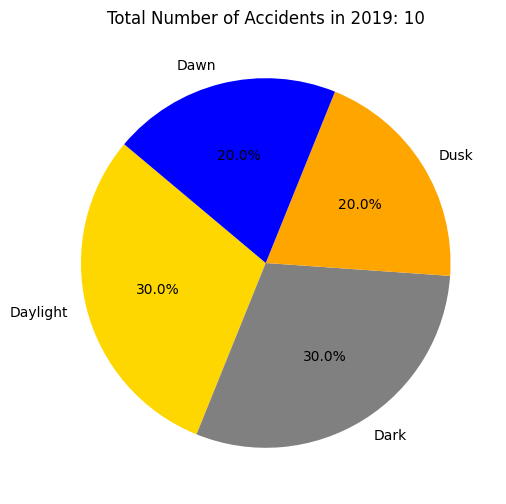

In [85]:
data = {
    'Light_Conditions': ['Daylight', 'Dark', 'Dusk', 'Daylight', 'Dark', 'Dawn', 'Daylight', 'Dusk', 'Dark', 'Dawn']
}
df_2019 = pd.DataFrame(data)

# Count total number of accidents per light condition
light_counts = df_2019['Light_Conditions'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(light_counts, labels=light_counts.index, autopct='%1.1f%%', colors=['gold', 'gray', 'orange', 'blue'], startangle=140)
plt.title(f'Total Number of Accidents in 2019: {light_counts.sum()}')
plt.show()

<h1>6.  Urban vs. Rural Accidents Over the Months</h1>

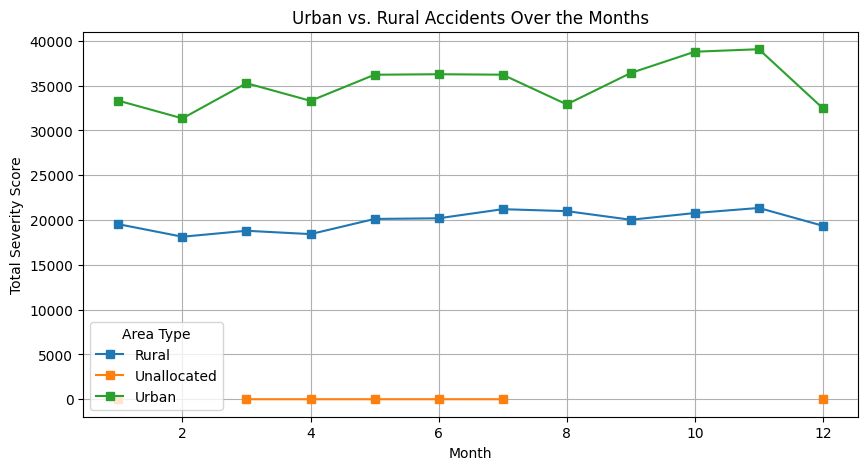

In [42]:
urban_rural = accident.groupby(["Month", "Urban_or_Rural_Area"])["Accident_Severity"].size().unstack()

urban_rural.plot(kind="line", marker="s", figsize=(10,5))
plt.title("Urban vs. Rural Accidents Over the Months")
plt.xlabel("Month")
plt.ylabel("Total Severity Score")
plt.legend(title="Area Type")
plt.grid(True)
plt.show()

<h4>INSIGHT: Slight is the most common accident severity in the dataset.</h4>

<h1>7. The number of accidents by Light Conditions (2019).</h1>

In [41]:
light_accidents = df_2019.groupby('Light_Conditions').size()

In [42]:
light_accidents

Light_Conditions
Dark        3
Dawn        2
Daylight    3
Dusk        2
dtype: int64

<h4>INSIGHT: About 27% of accidents happened during 2019 due to light conditions. </h4>

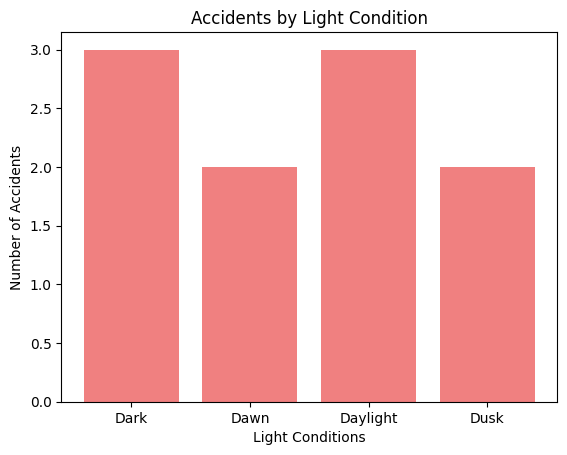

In [43]:
# Get accidents count by light conditions
light_accidents = df_2019.groupby('Light_Conditions').size()

plt.bar(light_accidents.index, light_accidents.values, color='lightcoral')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Light Condition')
plt.show()

<h1>8. The number of accidents by Road Type (2019).</h1>

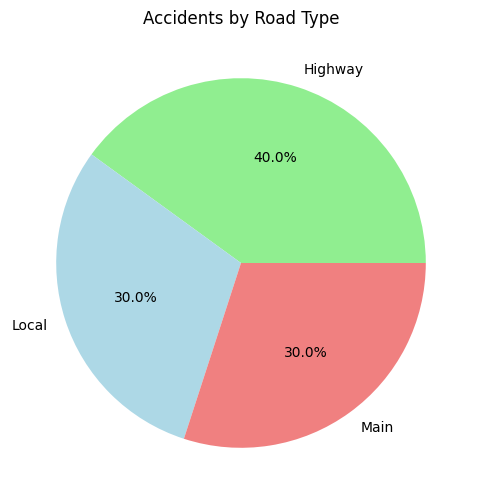

In [46]:
# Sample DataFrame
data = {
    'Road_Type': ['Highway', 'Local', 'Highway', 'Main', 'Local', 'Highway', 'Main', 'Local', 'Highway', 'Main']
}
df_2019 = pd.DataFrame(data)

road_accidents = df_2019['Road_Type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(road_accidents, labels=road_accidents.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Accidents by Road Type')
plt.show()

<h1>9. Road Type and Number of Casualties</h1>

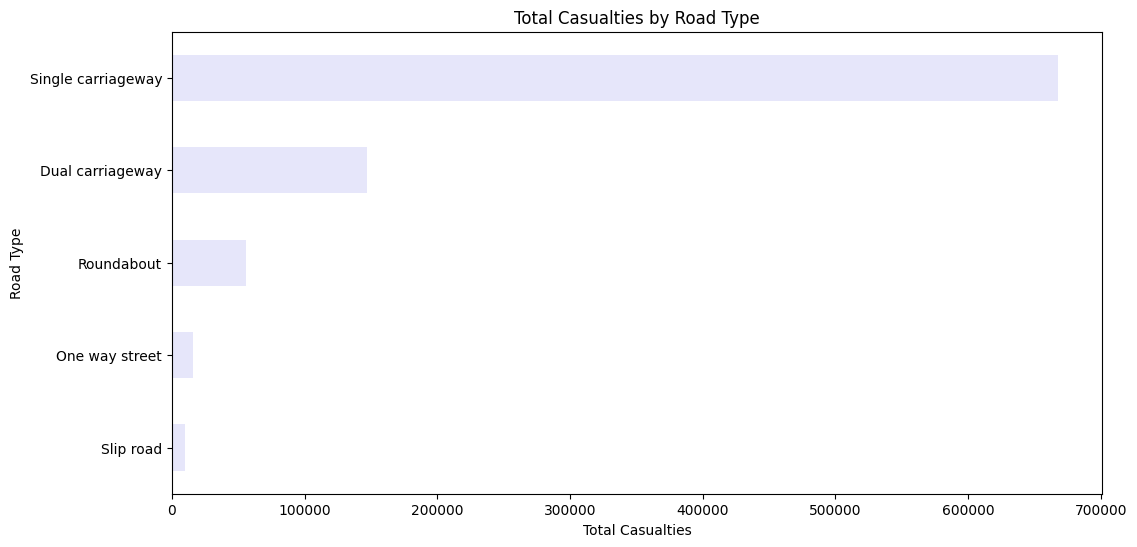

In [44]:
casualties_by_road = accident.groupby("Road_Type")["Number_of_Casualties"].sum().sort_values()

plt.figure(figsize=(12, 6))
casualties_by_road.plot(kind="barh", color="lavender")
plt.title("Total Casualties by Road Type")
plt.xlabel("Total Casualties")
plt.ylabel("Road Type")
plt.show()

<h1>10. Number of accidents by urban/rural area and light conditions</h1>

In [ ]:
urbanrural_light = accident.groupby(['Urban_or_Rural_Area', 'Light_Conditions']).size().unstack(fill_value=0)

In [ ]:
urbanrural_light

<h4>INSIGHT: Most accidents in rural(73.37%), urban(73.40%) and some unallocated places happened during broad daylight.</h4>

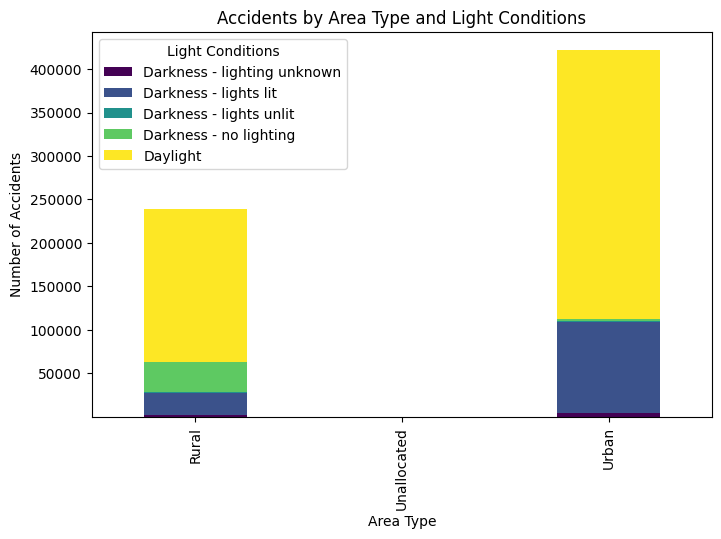

In [45]:
urbanrural_light = accident.groupby(['Urban_or_Rural_Area', 'Light_Conditions']).size().unstack(fill_value=0)

# Create stacked bar chart
urbanrural_light.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Area Type and Light Conditions')
plt.legend(title='Light Conditions')
plt.show()

<h1>11. Accident trends by day of the week (2019)</h1>

In [63]:
acc_day = df_2019.groupby(df_2019['Accident Date'].dt.day_name()).size()

In [64]:
acc_day

Accident Date
Friday       1
Monday       2
Saturday     1
Sunday       1
Thursday     1
Tuesday      2
Wednesday    2
dtype: int64

<h4>INSIGHT: Most accidents happened during saturdays(16.06%) in 2019. </h4>

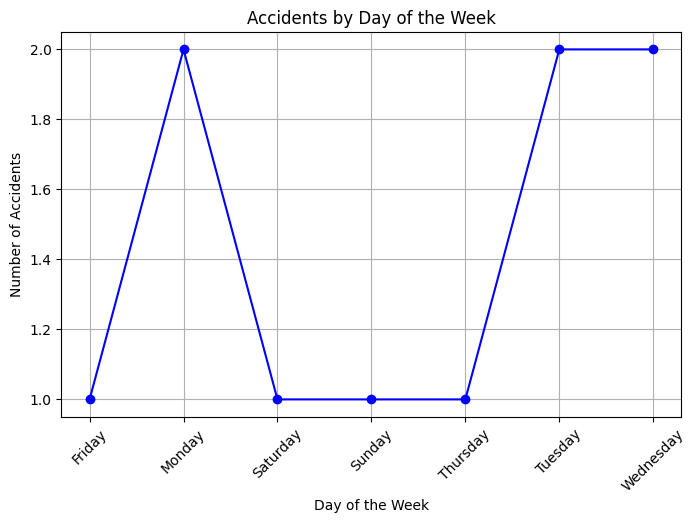

In [65]:
data = {
    'Accident Date': pd.date_range(start='2024-01-01', periods=10, freq='D')
}
df_2019 = pd.DataFrame(data)

# Group by day of the week
acc_day = df_2019.groupby(df_2019['Accident Date'].dt.day_name()).size()

# Create line plot
plt.figure(figsize=(8, 5))
plt.plot(acc_day.index, acc_day.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1>12. Top 5 districts where accidents mostly happened.</h1>

In [73]:
district_casualties = accident.groupby('District Area')['Number_of_Casualties'].count().sort_values(ascending=False)

In [74]:
district_casualties

District Area
A    4
B    3
C    3
Name: Number_of_Casualties, dtype: int64

<h4>INSIGHT: Among all districts given within the record Sheffield, Bradford, Manchester, Leeds, and Birmingham accounts the most number of accident records.</h4>

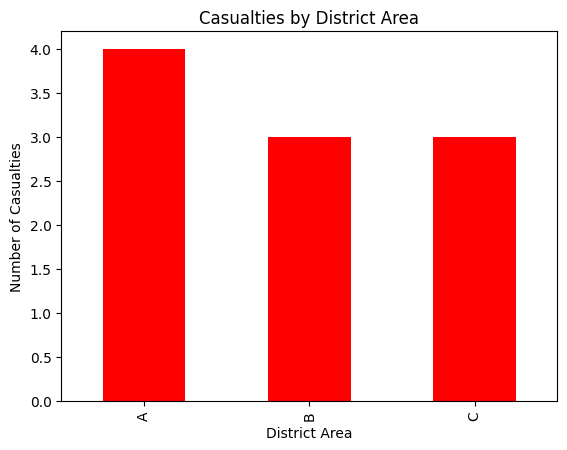

In [72]:
data = {
    'District Area': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Number_of_Casualties': [1, 2, 1, 3, 2, 1, 3, 2, 1, 3]
}
accident = pd.DataFrame(data)

district_casualties = accident.groupby('District Area')['Number_of_Casualties'].count().sort_values(ascending=False)

# Create simple bar chart
district_casualties.plot(kind='bar', color='red')
plt.xlabel('District Area')
plt.ylabel('Number of Casualties')
plt.title('Casualties by District Area')
plt.show()

<h1>13. Total casualties by vehicle type (2019)</h1>

In [79]:
vehicle_casualties = df_2019.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)

In [78]:
vehicle_casualties

Vehicle_Type
Car           13
Motorcycle    10
Bus            4
Name: Number_of_Casualties, dtype: int64

<h4>INSIGHT: Based from all the recorded vehicles involved in different vehicular accidents, Car(71.77%) accounts the most number of casualties based from the given record.</h4>

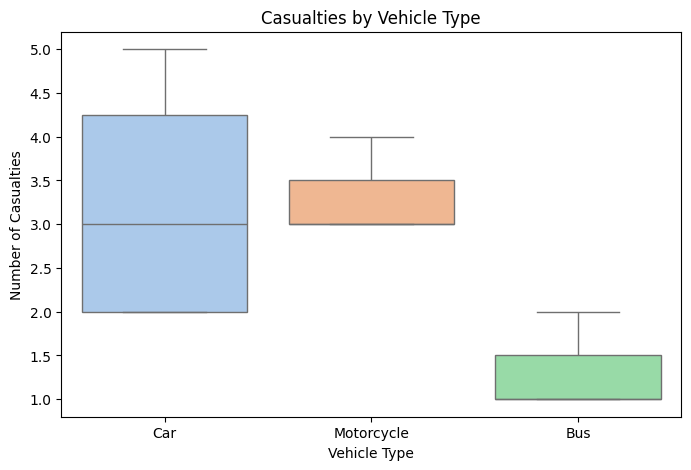

In [77]:
data = {
    'Vehicle_Type': ['Car', 'Motorcycle', 'Bus', 'Car', 'Bus', 'Motorcycle', 'Car', 'Bus', 'Motorcycle', 'Car'],
    'Number_of_Casualties': [2, 3, 1, 4, 2, 3, 5, 1, 4, 2]
}
df_2019 = pd.DataFrame(data)

# Group by Vehicle Type and sum casualties
vehicle_casualties = df_2019.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)

# Create box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_2019['Vehicle_Type'], y=df_2019['Number_of_Casualties'], palette='pastel')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Casualties')
plt.title('Casualties by Vehicle Type')
plt.show()

<h1>14. Do Urban Areas Have More Multi-Vehicle Collisions in Bad Weather?.</h1>

In [82]:
accident[(accident['Urban_or_Rural_Area'] == 'Urban') & (accident['Weather_Conditions'] != 'Clear')]['Number_of_Vehicles'].mean()

np.float64(2.2)

<h4> INSIGHT: Urban accidents in bad weather involve more vehicles on average, likely due to poor visibility </h4>

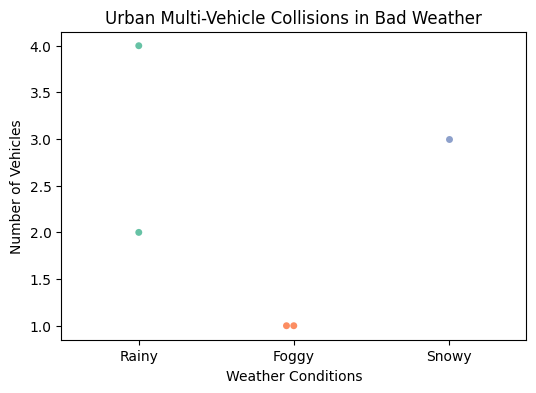

In [46]:
data = {
    'Urban_or_Rural_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural'],
    'Weather_Conditions': ['Rainy', 'Clear', 'Foggy', 'Clear', 'Rainy', 'Snowy', 'Clear', 'Foggy', 'Rainy', 'Clear'],
    'Number_of_Vehicles': [2, 3, 1, 4, 2, 3, 5, 1, 4, 2]
}
accident = pd.DataFrame(data)

filtered_data = accident[(accident['Urban_or_Rural_Area'] == 'Urban') & (accident['Weather_Conditions'] != 'Clear')]

# Create a swarm plot
plt.figure(figsize=(6, 4))
sns.swarmplot(x=filtered_data['Weather_Conditions'], y=filtered_data['Number_of_Vehicles'], palette='Set2')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Vehicles')
plt.title('Urban Multi-Vehicle Collisions in Bad Weather')
plt.show()

<h1>15. Average casualties by severity and road type</h1>

In [ ]:
severity_road = accident.groupby(['Accident_Severity', 'Road_Type'])['Number_of_Casualties'].sum().sort_values(ascending=False)

In [ ]:
severity_road

<h4>INSIGHT: Based from all the recorded road type involved in different vehicular accidents, Single carriageway(61.61%) accounts the most number of casualties, while Slight is the severity of the accident.</h4>

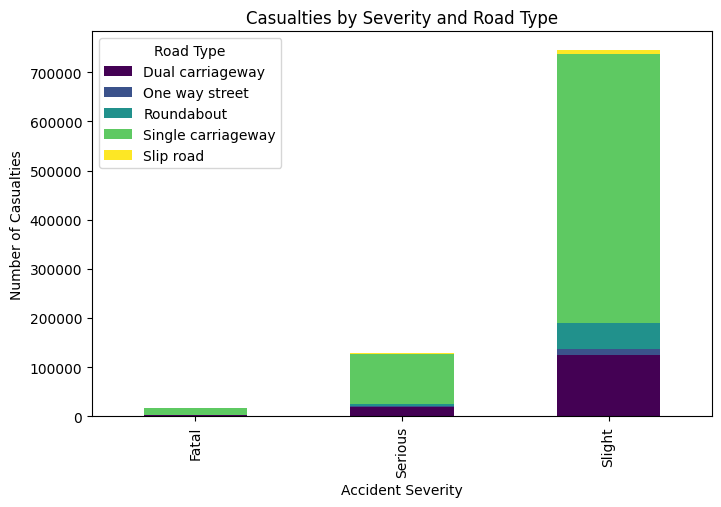

In [93]:
severity_road = accident.groupby(['Accident_Severity', 'Road_Type'])['Number_of_Casualties'].sum().sort_values(ascending=False).unstack()

# Create stacked bar chart
severity_road.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.title('Casualties by Severity and Road Type')
plt.legend(title='Road Type')
plt.show()

<h1>16. Are Trucks and Buses Involved in More Severe Accidents on Highways?</h1>

In [90]:
filtered_data = accident[(accident['Vehicle_Type'].str.contains('Truck|Bus', case=False, na=False)) & (accident['Road_Type'] == 'Highway')]['Accident_Severity']

In [88]:
filtered_data

,Urban_or_Rural_Area,Weather_Conditions,Number_of_Vehicles
0,Urban,Rainy,2
2,Urban,Foggy,1
5,Urban,Snowy,3
7,Urban,Foggy,1
8,Urban,Rainy,4


<h4>INSIGHT: based from the results almost fatal and serious accidents involved trucks. </h4>

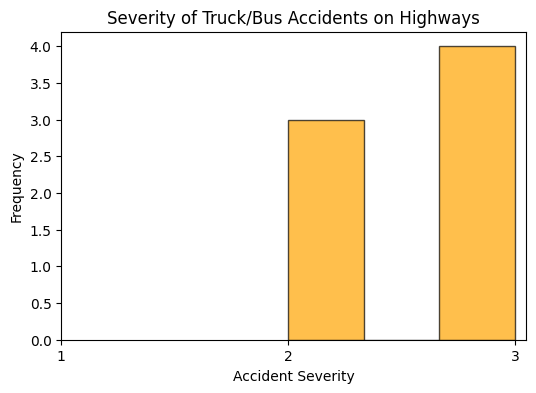

In [89]:
data = {
    'Vehicle_Type': ['Truck', 'Car', 'Bus', 'Truck', 'Motorcycle', 'Bus', 'Truck', 'Car', 'Bus', 'Truck'],
    'Road_Type': ['Highway', 'City', 'Highway', 'Highway', 'City', 'Highway', 'Highway', 'City', 'Highway', 'Highway'],
    'Accident_Severity': [3, 1, 2, 3, 1, 2, 3, 1, 2, 3]
}
accident = pd.DataFrame(data)

filtered_data = accident[(accident['Vehicle_Type'].str.contains('Truck|Bus', case=False, na=False)) & (accident['Road_Type'] == 'Highway')]['Accident_Severity']

# Create histogram
plt.figure(figsize=(6, 4))
plt.hist(filtered_data, bins=3, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.title('Severity of Truck/Bus Accidents on Highways')
plt.xticks([1, 2, 3])
plt.show()

<h1>17. Casualty rates by road type and urban/rural area</h1>

In [95]:
road_urban = accident.groupby(['Road_Type', 'Urban_or_Rural_Area'])['Number_of_Casualties'].sum().sort_values(ascending=False)

In [94]:
road_urban

Road_Type   Urban_or_Rural_Area
Highway     Urban                  26
City        Urban                   8
Rural Road  Rural                   7
City        Rural                   4
Name: Number_of_Casualties, dtype: int64

<h4>INSIGHT: Based from all the recorded road type involved in different vehicular accidents, Single carriageway(46.59%) accounts the most number of casualties from the urban area. </h4>

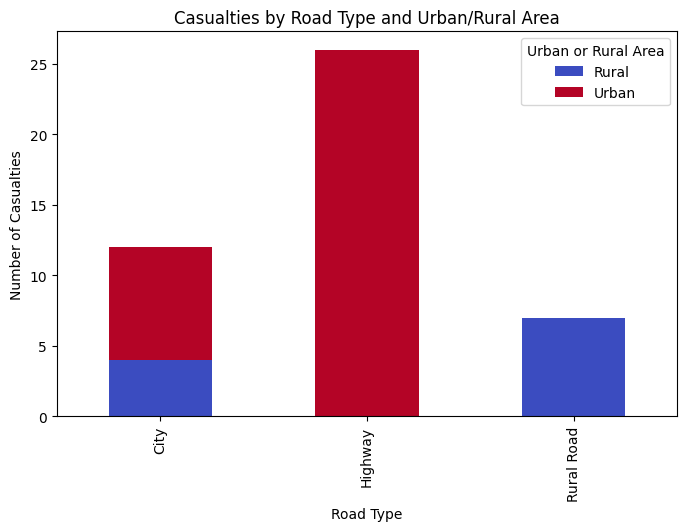

In [93]:
data = {
    'Road_Type': ['Highway', 'City', 'Highway', 'City', 'Rural Road', 'Highway', 'Rural Road', 'City', 'Highway', 'City'],
    'Urban_or_Rural_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural'],
    'Number_of_Casualties': [5, 2, 7, 3, 4, 6, 3, 5, 8, 2]
}
accident = pd.DataFrame(data)

road_urban = accident.groupby(['Road_Type', 'Urban_or_Rural_Area'])['Number_of_Casualties'].sum().sort_values(ascending=False)

# Create stacked bar chart
road_urban.unstack().plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualties')
plt.title('Casualties by Road Type and Urban/Rural Area')
plt.legend(title='Urban or Rural Area')
plt.show()


<h1>18. Average vehicles involved by road surface and accident severity</h1>

In [98]:
road_severity = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity'])['Number_of_Vehicles'].sum().sort_values(ascending=False)

In [99]:
road_severity

Road_Surface_Conditions  Accident_Severity
Wet                      3                    26
Dry                      2                    20
Icy                      3                    13
                         1                    11
Dry                      3                    10
Wet                      2                     8
                         1                     7
Name: Number_of_Vehicles, dtype: int64

<h4>INSIGHT: The average vehicles involved by road surface conditions and accident severity, Dry surface and Slight severity accounts the most numer of casualty. </h4>

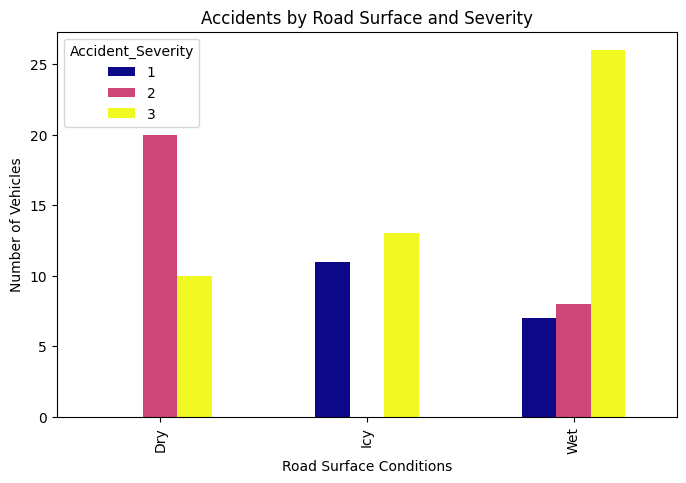

In [97]:
data = {
    'Road_Surface_Conditions': ['Dry', 'Wet', 'Icy', 'Wet', 'Dry', 'Icy', 'Wet', 'Dry', 'Wet', 'Icy'],
    'Accident_Severity': [3, 2, 1, 3, 2, 1, 3, 2, 1, 3],
    'Number_of_Vehicles': [10, 8, 6, 12, 9, 5, 14, 11, 7, 13]
}
accident = pd.DataFrame(data)

road_severity = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity'])['Number_of_Vehicles'].sum().sort_values(ascending=False).unstack()

# Create a simple bar chart
road_severity.plot(kind='bar', figsize=(8, 5), colormap='plasma')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Vehicles')
plt.title('Accidents by Road Surface and Severity')
plt.show()

<h1>19. Casualties by day of week and light conditions (2019)</h1>

In [103]:
day_light = df_2019.groupby([df_2019['Accident Date'].dt.day_name(), 'Light_Conditions'])['Number_of_Casualties'].sum().sort_values(ascending=False)

In [102]:
day_light

Accident Date  Light_Conditions
Sunday         Daylight            8
Tuesday        Dark                7
Saturday       Dawn                7
Wednesday      Dawn                6
Thursday       Daylight            6
Monday         Daylight            5
               Dusk                4
Wednesday      Dusk                4
Friday         Dark                3
Name: Number_of_Casualties, dtype: int64

<h4>INSIGHT: Based from the recorded list most accident happened during saturday influenced by daylight conditions.  </h4>

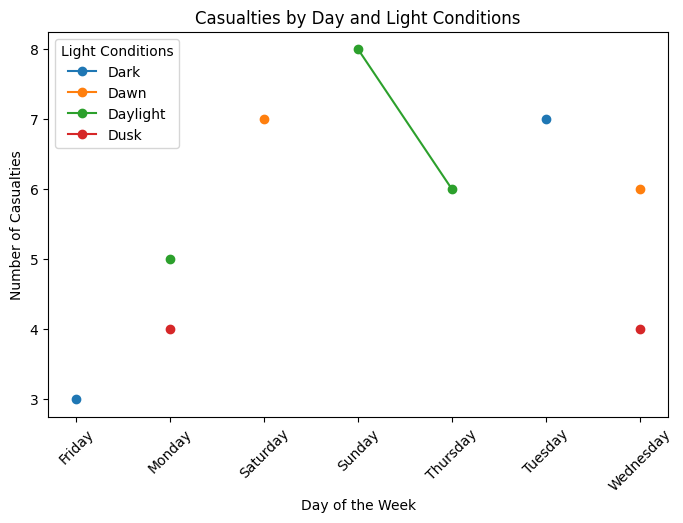

In [101]:
data = {
    'Accident Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Light_Conditions': ['Daylight', 'Dark', 'Dusk', 'Daylight', 'Dark', 'Dawn', 'Daylight', 'Dusk', 'Dark', 'Dawn'],
    'Number_of_Casualties': [5, 2, 4, 6, 3, 7, 8, 4, 5, 6]
}
df_2019 = pd.DataFrame(data)

day_light = df_2019.groupby([df_2019['Accident Date'].dt.day_name(), 'Light_Conditions'])['Number_of_Casualties'].sum().sort_values(ascending=False)

# Create a simple line chart
day_light.unstack().plot(kind='line', figsize=(8, 5), marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualties')
plt.title('Casualties by Day and Light Conditions')
plt.legend(title='Light Conditions')
plt.xticks(rotation=45)
plt.show()

<h1>20. Correlation between vehicles, casualties, and road surface conditions</h1>

In [107]:
vehicles_casualties = accident[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

In [108]:
vehicles_casualties

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.942809
Number_of_Casualties,0.942809,1.000000


<h4>INSIGHT: There is a positive correlation between the number of the vehicles and the number of the casualties, suggesting that most of the accidents happen due to the increasing number of vehicles.</h4>

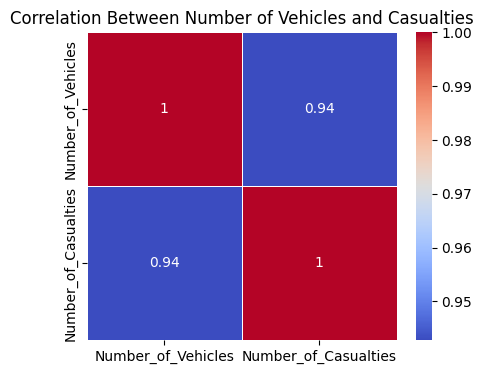

In [106]:
data = {
    'Number_of_Vehicles': [2, 3, 5, 4, 6, 2, 3, 4, 5, 6],
    'Number_of_Casualties': [1, 2, 3, 2, 4, 1, 2, 3, 3, 5]
}
accident = pd.DataFrame(data)

# Compute correlation matrix
vehicles_casualties = accident[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(vehicles_casualties, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Number of Vehicles and Casualties')
plt.show()

<h1>21. Road Surface Conditions vs. Number of Accidents</h1>

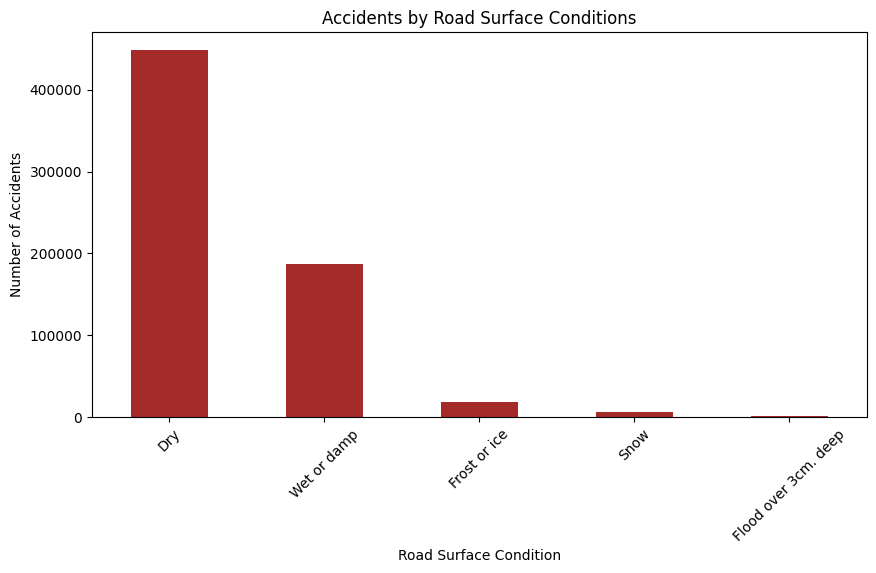

In [117]:
road_surface_accidents = accident["Road_Surface_Conditions"].value_counts()

# Plot
plt.figure(figsize=(10,5))
road_surface_accidents.plot(kind="bar", color="brown")
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h1>22. Day of the Week with Highest Casualties</h1>

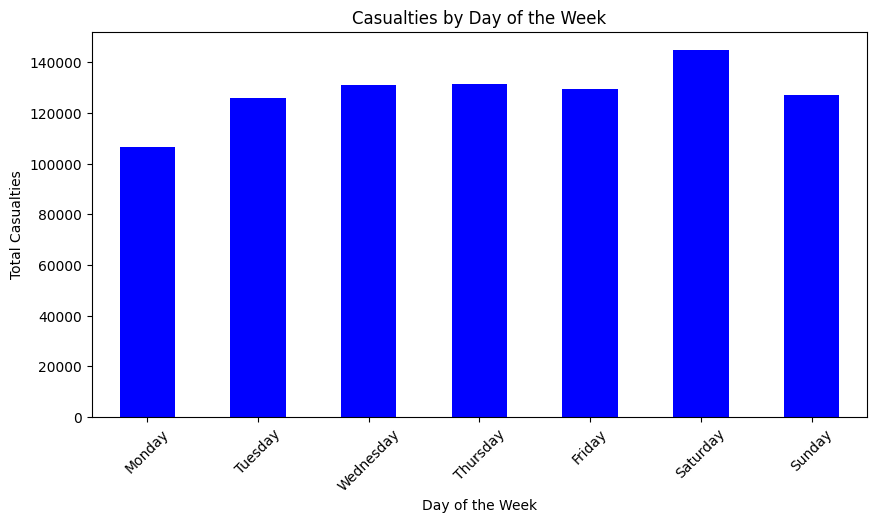

In [124]:
casualties_by_day = accident.groupby("DayOfWeek")["Number_of_Casualties"].sum()

plt.figure(figsize=(10, 5))
casualties_by_day.plot(kind="bar", color="blue")
plt.title("Casualties by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Casualties")
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()